In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For saving model
import joblib

# Ensure plots are inline
%matplotlib inline


In [3]:
# Set dataset path (adjust if needed)
pima_path = r"C:\Users\vansh\OneDrive\Documents\diabetic_screening_project\data\pima\diabetes.csv"

# Load CSV
pima = pd.read_csv(pima_path)

# Basic info
print("Dataset Shape:", pima.shape)
print(pima.info())
pima.head()


Dataset Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              B

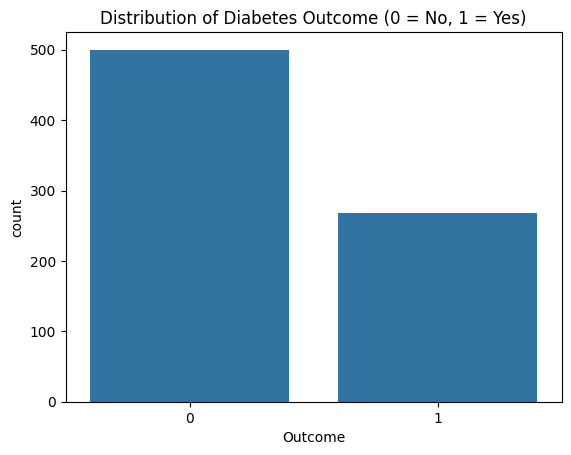

In [4]:
print("Missing values:\n", pima.isnull().sum())

# Summary statistics
print(pima.describe())

# Outcome distribution
sns.countplot(x='Outcome', data=pima)
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()

In [5]:
# 4️⃣ Handle Invalid Zeros in Specific Columns
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols_with_zeros:
    median_value = pima[col].median()
    pima[col] = pima[col].replace(0, median_value)

# Verify zeros removed
for col in cols_with_zeros:
    print(f"{col} zeros after replacement:", (pima[col] == 0).sum())


Glucose zeros after replacement: 0
BloodPressure zeros after replacement: 0
SkinThickness zeros after replacement: 0
Insulin zeros after replacement: 0
BMI zeros after replacement: 0


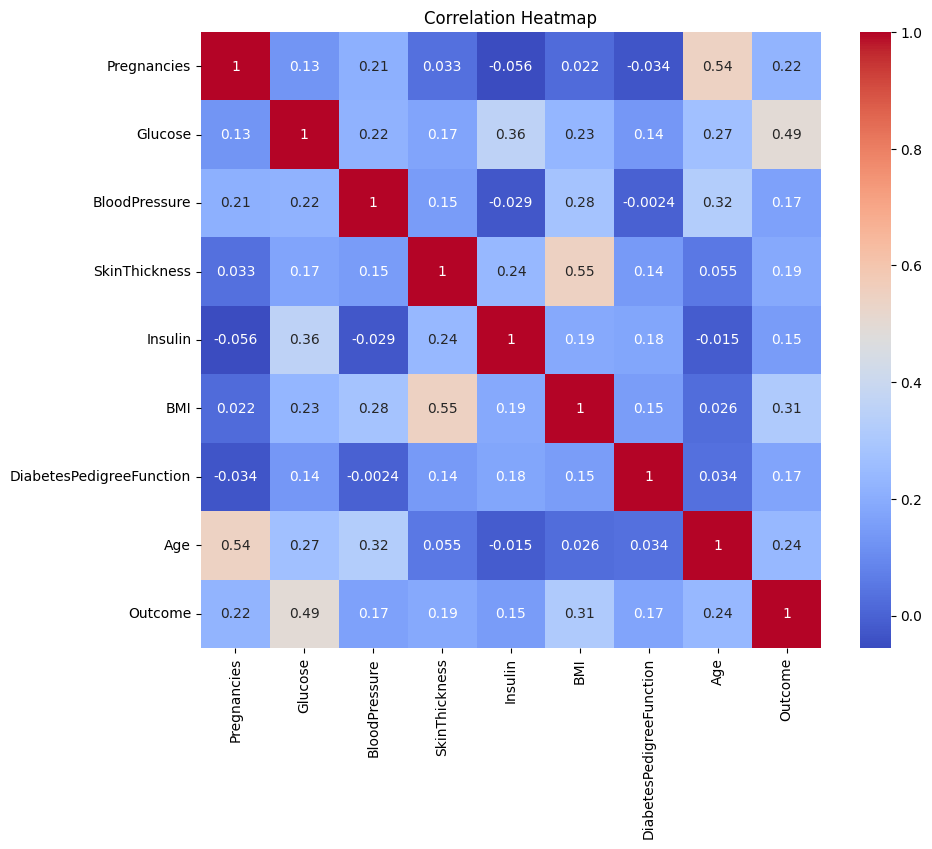

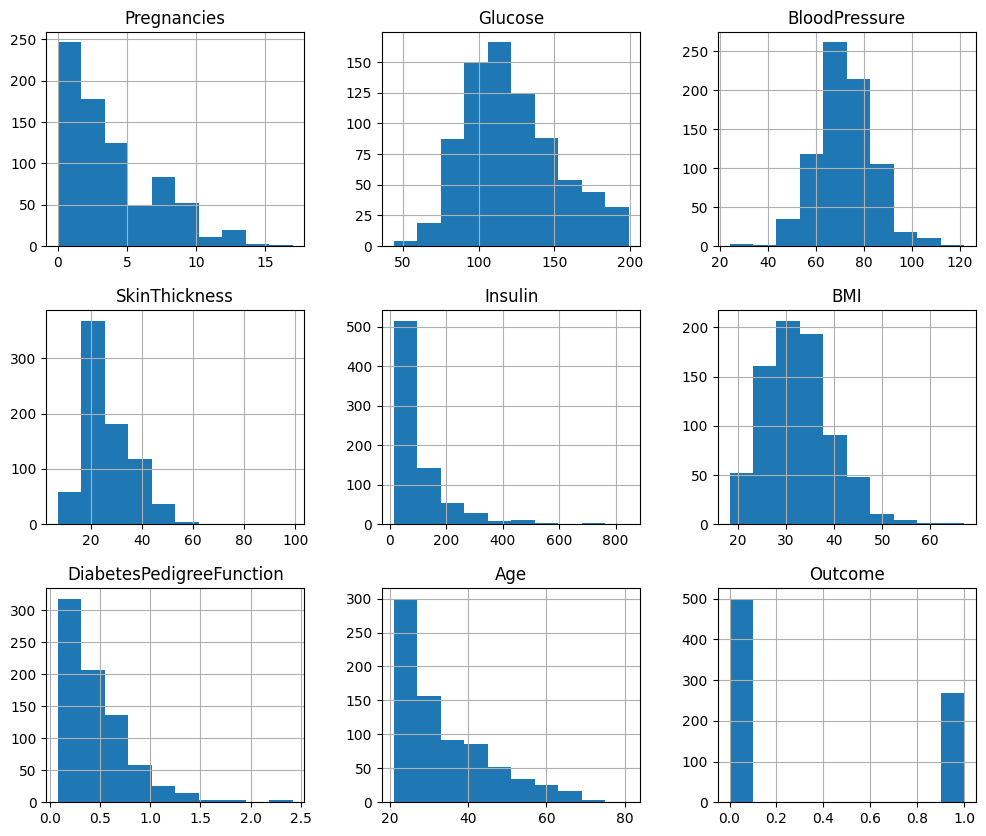

In [6]:
# 5️⃣ Feature Correlation and Visualization
plt.figure(figsize=(10,8))
sns.heatmap(pima.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Histograms of features
pima.hist(figsize=(12,10))
plt.show()


In [7]:
# 6️⃣ Feature & Target Split
X = pima.drop("Outcome", axis=1)
y = pima["Outcome"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (768, 8)
Target shape: (768,)


In [9]:
# 7️⃣ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


X_train: (614, 8) X_test: (154, 8)
y_train: (614,) y_test: (154,)


In [10]:
# 8️⃣ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# 9️⃣ Build & Train MLP Classifier


mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    verbose=True
)
mlp.fit(X_train_scaled, y_train)



Iteration 1, loss = 0.67841133
Iteration 2, loss = 0.64569461
Iteration 3, loss = 0.61863459
Iteration 4, loss = 0.59476328
Iteration 5, loss = 0.57196612
Iteration 6, loss = 0.55187977
Iteration 7, loss = 0.53359381
Iteration 8, loss = 0.51778516
Iteration 9, loss = 0.50454050
Iteration 10, loss = 0.49270347
Iteration 11, loss = 0.48326060
Iteration 12, loss = 0.47501170
Iteration 13, loss = 0.46830041
Iteration 14, loss = 0.46267437
Iteration 15, loss = 0.45710753
Iteration 16, loss = 0.45240253
Iteration 17, loss = 0.44863964
Iteration 18, loss = 0.44537589
Iteration 19, loss = 0.44245898
Iteration 20, loss = 0.43995738
Iteration 21, loss = 0.43843617
Iteration 22, loss = 0.43648658
Iteration 23, loss = 0.43473714
Iteration 24, loss = 0.43301094
Iteration 25, loss = 0.43143190
Iteration 26, loss = 0.42998366
Iteration 27, loss = 0.42926339
Iteration 28, loss = 0.42840448
Iteration 29, loss = 0.42693966
Iteration 30, loss = 0.42561803
Iteration 31, loss = 0.42356402
Iteration 32, los

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


Test Accuracy: 0.7727272727272727

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       100
           1       0.67      0.69      0.68        54

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



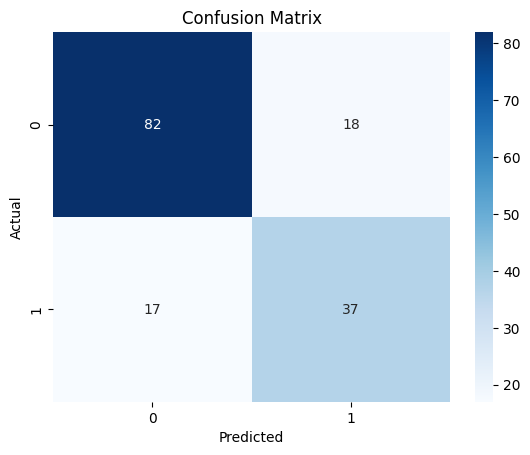

In [15]:
# 🔟 Evaluate Model
y_pred = mlp.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
# 1️⃣1️⃣ Save Model & Scaler
os.makedirs("models", exist_ok=True)
joblib.dump(mlp, "models/pima_mlp_model.pkl")
joblib.dump(scaler, "models/pima_scaler.pkl")

print("MLP model and scaler saved successfully.")


MLP model and scaler saved successfully.
